Medina, Alex - Brightness Phase Curve - Initial

In [2]:
#General imports
import numpy as np
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import pandas as pd
import os

#Important imports
import cv2
import vicar

The basic equation for geometric albedo per the theory, as all that we have to do is sum all of the pixels in the image.

In [3]:
#Initial test, from ISS User Guide page 138
def geometric_albedo_initial(image, pixel_scale):

    #R is the radius of Titan for normalization
    R = 2575 #km

    #Total number of pixels
    n_pixel = np.pi * R**2 / pixel_scale**2
    total_IF = np.sum(image)

    return total_IF / n_pixel

In [4]:
#Path to the folder with the calibrated images
calibrated_images = r'C:\Users\alexi\Desktop\Research\Cassini_Images\CL1_BL2'

#Path to where the .csv file is from, either on Drive or even locally if you choose so
metadata_file = r'C:\Users\alexi\Desktop\Research\Cassini_Images\CL1_BL2\data.csv'

#Reading the csv file
parameters_df = pd.read_csv(metadata_file)

In [5]:
#Executing a loop to determine all relavant information for plots

geom_albedos = []
phase_angles = []

#Because the .IMG calibrated images don't match 1:1 with the metadata, we have to do some fun things
for filename in os.listdir(calibrated_images):

    #Since we have a loop for each image, each calibrated image universally ends with _CALIB.IMG, so that full path is given as
    if filename.endswith('_CALIB.IMG'):
        calibrated_image_path = os.path.join(calibrated_images, filename)

        #Reading the binary image file using rms-vicar
        vic = vicar.VicarImage(calibrated_image_path, strict=False)
        image = vic.data_2d

        #Calibrated images are named as: N1463897371_1_CALIB.IMG
        #But the metadata is labled as: co-iss-n1463897371
        #The metadata associated with the calibrated image matches by n1463897371
        #Hence, the opus id comes from everything before the first underscore
        opus_id = filename.split('_')[0]

        #Adding the prefix 'co-iss-' to match the OPUS ID format in .csv, but also case sensitive
        #Hence we match the calibrated image with its metadata
        opus_id_with_prefix = f'co-iss-{opus_id}'.lower()

        #Associated row in the .csv
        parameter_row = parameters_df[parameters_df['OPUS ID'].str.contains(opus_id_with_prefix)]

        if not parameter_row.empty:
            #Assocating the meta data with the image, pixel_scale and phase_angle
            phase_angle = parameter_row['Observed Phase Angle (Min) [Titan] (degrees)'].values[0]
            pixel_scale = parameter_row['Body Center Resolution (Min) [Titan] (km/pixel)'].values[0]

            albedo = geometric_albedo_initial(image, pixel_scale)

            #Creating array to plot
            phase_angles.append(phase_angle)
            geom_albedos.append(albedo)

            #For manual inspection
            print(f'{filename}: {albedo}')

N1525327484_1_CALIB.IMG: 0.06221586085381125
N1557905313_1_CALIB.IMG: 0.0986656001367244
N1559282826_1_CALIB.IMG: 0.10457364780577175
N1562037473_1_CALIB.IMG: 0.11132114163473002
N1567440211_1_CALIB.IMG: 0.10560363144987397
N1570185934_1_CALIB.IMG: 0.09810028080219844
N1571476437_1_CALIB.IMG: 0.050156457949785224
N1578503768_1_CALIB.IMG: 0.07293500366747209
N1617163704_1_CALIB.IMG: 0.03735809841985432
N1617165504_1_CALIB.IMG: 0.03723014271166407
N1644998153_1_CALIB.IMG: 0.0959031064543076
N1645008949_1_CALIB.IMG: 0.09301017396675618
N1645019749_1_CALIB.IMG: 0.09034474939144974
N1646535965_1_CALIB.IMG: 0.0833861324041618
N1671761950_1_CALIB.IMG: 0.05341156388040707
N1671884383_1_CALIB.IMG: 0.044458016217023846
N1687626097_1_CALIB.IMG: 0.11176495038535635
N1725076622_1_CALIB.IMG: 0.05503450653376233
N1732144031_1_CALIB.IMG: 0.07148849500206218
N1848497852_1_CALIB.IMG: 0.04413275158346657
N1849875641_1_CALIB.IMG: 0.04372968919138376
N1849961982_1_CALIB.IMG: 0.043926793274584895
N185013481

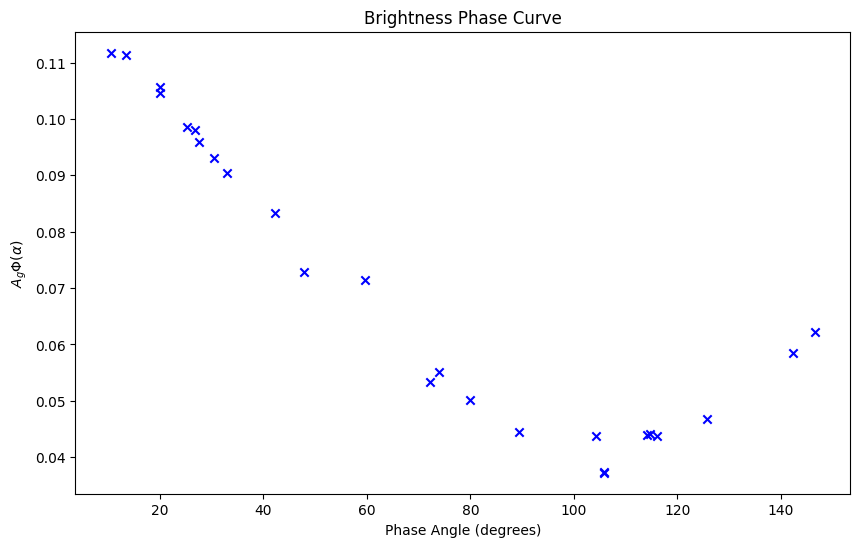

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(phase_angles, geom_albedos, color='b', marker='x')
plt.xlabel('Phase Angle (degrees)')
plt.ylabel(r'$A_g \Phi(\alpha)$')
plt.title('Brightness Phase Curve')
plt.show()

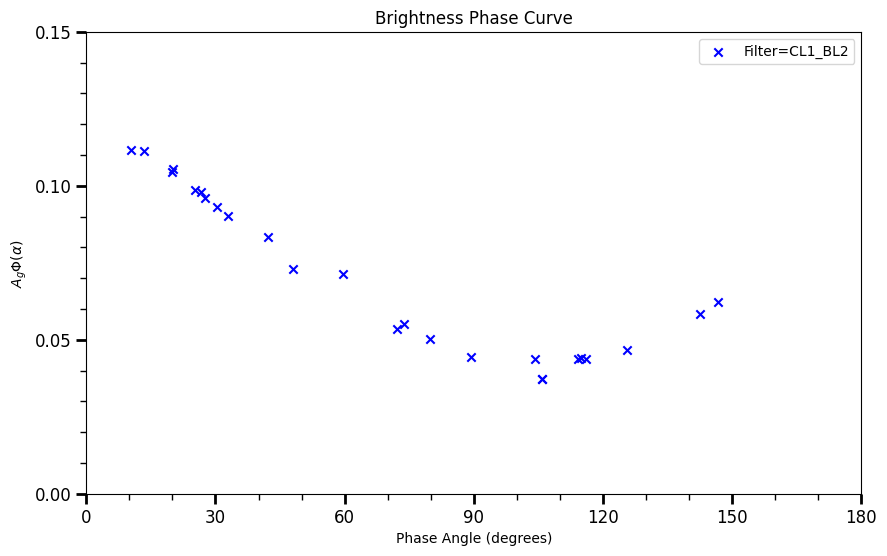

In [9]:
#Fancy plot for consistency across all plots but also visually will look better

filtername = 'CL1_BL2'

#Same size and parameters as before
plt.figure(figsize=(10, 6))
plt.scatter(phase_angles, geom_albedos, color='b', marker='x', label=f'Filter={filtername}')
plt.xlabel('Phase Angle (degrees)')
plt.ylabel(r'$A_g \Phi(\alpha)$')
plt.title('Brightness Phase Curve')

#Selecting x-ticks, for them at every 10 but also every 30 will be more pronounces
ax = plt.gca()
ax.set_xticks(range(0, 181, 30))
ax.set_xticks(range(0, 181, 10), minor=True)

ax.tick_params(axis='x', which='major', length=7, width=2, labelsize=12)
ax.tick_params(axis='x', which='minor', length=4, width=1, labelsize=10)

#Same for the y-axis
#While the x-axis is phase so remains consistent, I use above section of code to determine split on for y-axis
#Usually, ticks every 0.05, starts from 0 to the top
ay = plt.gca()
ay.set_yticks([i * 0.05 for i in range(4)], minor=False)
ay.set_yticks([i * 0.01 for i in range(15)], minor=True) 
plt.ylim(0, 0.15)

ay.tick_params(axis='y', which='major', length=7, width=2, labelsize=12)
ay.tick_params(axis='y', which='minor', length=4, width=1, labelsize=10)

plt.legend()
plt.show()